# Assignment on Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1. Read the dataset to python environment

In [2]:
df=pd.read_csv(r'G:\course\ICT academy\Assignments\Assignment_5\iris.csv')
df.head(3)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa


In [3]:
df.shape

(150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 2. Do the necessary pre-processing steps

In [6]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

### 2.1 Outlier detecting and capping

In [8]:
df[['SL','SW','PL','PW']].skew()

SL    0.306823
SW    0.377818
PL   -0.268905
PW   -0.104997
dtype: float64

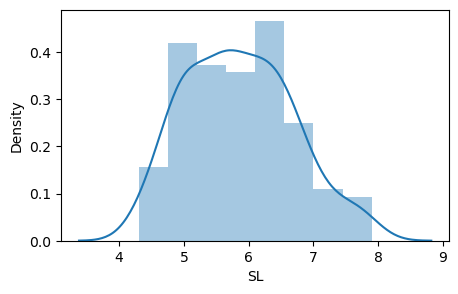

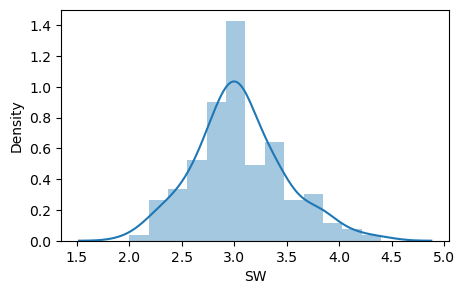

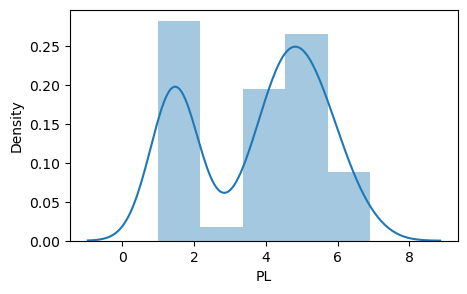

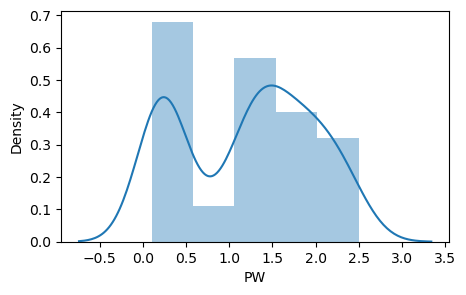

In [9]:
col=['SL','SW','PL','PW']
for i in col:
    plt.figure(figsize=(5,3))
    sns.distplot(df[i])
    plt.show()

In [10]:
for c in col:
  q1=df1[c].quantile(0.25)
  q3=df1[c].quantile(0.75)
  iqr=q3-q1
  ul=q3+1.5*iqr
  ll=q1-1.5*iqr
  df1[c]=np.where(df1[c]>ul,ul,np.where(df1[c]<ll,ll,df1[c]))

### 2.2 Missing value imputation by group mean

In [7]:
df1=df.copy()
df1[['SL','SW','PL','PW']] = df[['SL','SW','PL','PW']].fillna(df.groupby('Classification')[['SL','SW','PL','PW']].transform('mean'))
df1.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

### 2.3 Label Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder
le =  LabelEncoder()
    
df1['Classification'] =  le.fit_transform(df1['Classification'])
df1.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.008511,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


In [15]:
df1['Classification'].value_counts()

Classification
0    50
1    50
2    50
Name: count, dtype: int64

### 2.4 Train Test split

In [31]:
from sklearn.model_selection import train_test_split

X = df1.drop(columns = ['Classification'],axis = 1)
y = df1['Classification']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33,random_state = 42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(100, 4)
(100,)
(50, 4)
(50,)


## 3. Find out which classification model gives the best result (try all the classification algorithms discussed in the session)

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score,f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [42]:
logr = LogisticRegression()

dtc = DecisionTreeClassifier()

rfc = RandomForestClassifier()

knn = KNeighborsClassifier()

nb = GaussianNB()

svm = SVC()

In [43]:
models=[logr,svm,nb,rfc,knn,dtc]
for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(model,"\n")
    print("Accuracy score :", accuracy_score(y_test,y_pred)*100)
    print("Precision score :", precision_score(y_test,y_pred, average='macro'))
    print("Recall score :",recall_score(y_test,y_pred, average='macro'))
    print("F1 score score :", f1_score(y_test,y_pred, average='macro'))
    print("-" * 50,"\n")

LogisticRegression() 

Accuracy score : 100.0
Precision score : 1.0
Recall score : 1.0
F1 score score : 1.0
-------------------------------------------------- 

SVC() 

Accuracy score : 100.0
Precision score : 1.0
Recall score : 1.0
F1 score score : 1.0
-------------------------------------------------- 

GaussianNB() 

Accuracy score : 98.0
Precision score : 0.9791666666666666
Recall score : 0.9791666666666666
F1 score score : 0.978494623655914
-------------------------------------------------- 

RandomForestClassifier() 

Accuracy score : 98.0
Precision score : 0.9791666666666666
Recall score : 0.9791666666666666
F1 score score : 0.978494623655914
-------------------------------------------------- 

KNeighborsClassifier() 

Accuracy score : 98.0
Precision score : 0.9791666666666666
Recall score : 0.9791666666666666
F1 score score : 0.978494623655914
-------------------------------------------------- 

DecisionTreeClassifier() 

Accuracy score : 98.0
Precision score : 0.97916666666666

In [44]:
models=[logr,svm,nb,rfc,knn,dtc]
for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(model,"\n")
    print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
    print("-" * 50,"\n")

LogisticRegression() 

Confusion matrix 
 [[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]
-------------------------------------------------- 

SVC() 

Confusion matrix 
 [[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]
-------------------------------------------------- 

GaussianNB() 

Confusion matrix 
 [[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
-------------------------------------------------- 

RandomForestClassifier() 

Confusion matrix 
 [[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
-------------------------------------------------- 

KNeighborsClassifier() 

Confusion matrix 
 [[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
-------------------------------------------------- 

DecisionTreeClassifier() 

Confusion matrix 
 [[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
-------------------------------------------------- 



In [37]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [41]:
y_test1=np.array(y_test)
y_test1

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

## 4. Conclusion
* SVM and Logistic regression algorithm models have a perfect **accuracy and f1_score** of **100%**. 
* The results are cross verified using the above given code blocks, comparing the actual to the predicted.
* Confusion matrix is also used to verify that there are **no Errors** present in the 2 models.
* The **best models** for predicting the iris classification are **SVM** and **Logistic Regression**.